In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree

In [40]:
data = pd.read_csv('/Users/gayatridevadula/Downloads/Engineering_graduate_salary.csv')

In [41]:
data.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,22/10/90,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,15/05/90,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,21/08/89,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,04/05/91,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,30/10/90,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [42]:
data.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [43]:
data.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [66]:
data=data.drop(['12board'],axis=1)

In [67]:
X = data.drop('Salary', axis=1)
y = data['Salary']
X

,10percentage,12percentage,CollegeTier,collegeGPA,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,87.80,84.00,1,73.82,-0.1590,0.3789,1.2396,0.14590,0.2889
1,57.00,64.50,2,65.00,1.1336,0.0459,1.2396,0.52620,-0.2859
2,77.33,85.17,2,61.94,0.5100,-0.1232,1.5428,-0.29020,-0.2875
3,84.30,86.00,1,80.40,-0.4463,0.2124,0.3174,0.27270,0.4805
4,82.00,75.00,2,64.30,-1.4992,-0.7473,-1.0697,0.06223,0.1864
...,...,...,...,...,...,...,...,...,...
144,87.70,95.20,2,69.96,-0.1590,-0.4536,0.9322,-0.23440,-0.6692
145,88.00,78.00,2,87.90,-3.0315,-2.1186,-1.0659,0.39950,-1.6273
146,80.80,81.50,2,74.00,1.9953,1.0449,0.4711,-1.62890,0.8637
147,77.60,59.00,2,58.66,0.0464,0.9688,-0.1988,-0.70150,-1.2354


In [68]:
y

0      445000
1      110000
2      255000
3      420000
4      200000
        ...  
144    200000
145    420000
146    100000
147    120000
148    315000
Name: Salary, Length: 149, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [70]:
X_train

,10percentage,12percentage,CollegeTier,collegeGPA,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
91,72.00,60.0,2,63.00,1.8517,0.8784,1.5470,-0.23440,0.4805
114,69.00,72.2,2,69.78,0.5591,0.2124,-0.4511,-1.37530,0.6721
14,86.40,86.2,2,81.40,1.2772,1.0449,0.7785,-1.24860,0.6721
44,74.60,80.8,2,72.45,0.8192,0.3448,1.1074,-0.17270,1.4502
89,78.00,68.0,1,72.30,0.8463,-0.4536,0.3174,-0.99500,0.0973
...,...,...,...,...,...,...,...,...,...
75,78.00,87.1,2,65.00,-1.3080,-1.1196,0.4711,0.01920,0.6721
43,70.16,66.8,2,69.70,-0.4463,-1.1196,0.0100,0.52620,-0.0943
22,61.00,59.0,2,63.00,-0.8810,0.6568,0.6720,1.47240,0.3444
72,90.33,88.6,2,69.55,0.5100,1.4368,-0.0537,-1.34787,0.8973


In [71]:
X_test

,10percentage,12percentage,CollegeTier,collegeGPA,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
115,89.56,85.00,2,67.45,-3.0448,-1.0593,-0.6343,0.76730,0.1864
48,52.93,64.00,2,73.00,0.2718,-0.1206,0.3174,-1.88240,-0.4776
3,84.30,86.00,1,80.40,-0.4463,0.2124,0.3174,0.27270,0.4805
42,65.00,47.60,2,63.00,0.2009,-0.7473,0.3817,0.53230,0.3444
126,75.85,77.20,2,80.00,-0.1590,0.8784,1.0859,-0.99500,1.0554
24,67.06,70.67,2,55.50,1.1336,-0.2871,-0.1437,0.14590,0.2889
108,69.40,63.00,2,61.00,-1.1901,0.1888,-1.5051,-1.34787,-0.7615
12,85.00,88.00,2,85.00,-1.9629,-2.1903,-2.7750,0.41480,-0.4455
127,91.60,85.60,1,72.70,1.1336,0.5454,0.0100,-2.00920,0.8637
140,74.00,64.00,2,53.00,1.1283,-0.4353,0.3817,0.17980,0.5024


In [72]:
#Logistic Regression
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

/Users/gayatridevadula/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [73]:
y_pred = LR.predict(X_train)
print('Accuracy: ', accuracy_score(y_train, y_pred))

Accuracy:  0.25210084033613445


In [74]:
y_pred_LR = LR.predict(X_test)
LR.predict(X_test)

array([315000, 120000, 200000, 150000, 100000, 315000, 300000, 180000,
       200000, 215000, 240000, 260000, 150000, 315000, 200000, 300000,
       240000, 315000, 500000, 170000, 200000, 100000, 180000, 300000,
       140000, 300000, 240000, 320000, 120000, 310000])

In [75]:
print('Accuracy: ', accuracy_score(y_test, y_pred_LR))

Accuracy:  0.03333333333333333


In [76]:
#Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

In [77]:
print('Accuracy: ', accuracy_score(y_test, y_pred_tree))

Accuracy:  0.03333333333333333


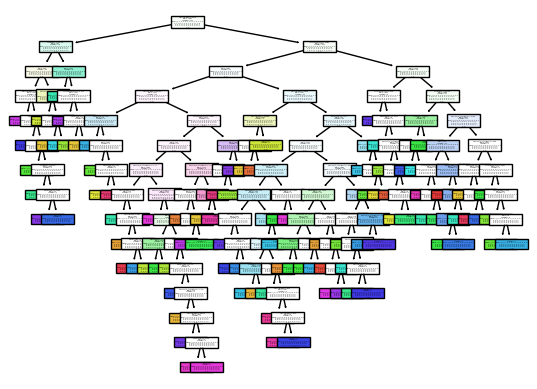

In [78]:
plot_tree(tree, filled=True, feature_names=list(X.columns)) 
plt.show()

In [79]:
#MultiLinear Perceptron Classifier
clf=MLPClassifier(random_state=1,max_iter=300).fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

/Users/gayatridevadula/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


array([315000, 120000, 200000, 240000, 200000, 315000, 300000, 180000,
       200000, 215000, 240000, 200000, 100000, 315000, 200000, 300000,
       240000, 200000, 450000, 170000, 200000, 100000, 180000, 300000,
       140000, 300000, 240000, 320000, 120000, 200000])

In [80]:
print('Accuracy: ', accuracy_score(y_test,y_pred))

Accuracy:  0.03333333333333333


In [81]:
#Knn Classifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [82]:
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))

Accuracy:  0.03333333333333333


In [83]:
#Linear Regression
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.27165120956528